# Análisis Exploratorio de Datos (EDA) - Dataset de Vehicle Fuel Economy
Este notebook realiza un análisis exploratorio de datos (EDA) en un dataset que contiene información sobre la economía de combustible de diferentes vehículos, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (actualiza la ruta del archivo si es necesario)
file_path = '/content/Vehicle Fuel Economy Data.csv'
data = pd.read_csv(file_path)

# Vista rápida de los datos
data.head()


<ipython-input-56-6f4f9049ad4a>:8: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0
2,2016,Infiniti,Q50S Red Sport,13.523182,0.0,0.0,20.0,19.0,0.0,0.0,...,NSX,NaN,0.0,NaN,04-04-2016,26-09-2016,N,0.0,0.0,0.0
3,2017,MINI,John Cooper Works Convertible,11.018889,0.0,0.0,24.0,23.0,0.0,0.0,...,BMX,NaN,0.0,NaN,12-04-2016,16-09-2016,Y,0.0,0.0,0.0
4,2017,Kia,Sedona SX,14.167143,0.0,0.0,18.0,18.0,0.0,0.0,...,KMX,NaN,0.0,NaN,12-04-2016,02-12-2016,N,0.0,0.0,0.0


In [ ]:

print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 46186 filas y 82 columnas.


1. # Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


Tipos de Datos y Valores Únicos:
              Data Type  Unique Values
Year             int64             41
Manufacturer    object            142
Model           object           4783
barrels08      float64            285
barrelsA08     float64              8
...                ...            ...
modifiedOn      object            280
startStop       object              2
phevCity       float64             54
phevHwy        float64             52
phevComb       float64             51

[82 rows x 2 columns]


## 2. Valores Faltantes
Aquí mostramos la cantidad de valores faltantes en cada columna para identificar aquellas con datos incompletos.


In [ ]:
# Contar valores faltantes en cada columna
missing_values = data.isnull().sum()
print("\nValores Faltantes por Columna:\n", missing_values[missing_values > 0])



Valores Faltantes por Columna:
 Model            10
barrels08        17
barrelsA08       17
charge240        17
city08           17
              ...  
modifiedOn     2016
startStop     31829
phevCity       2016
phevHwy        2016
phevComb       2016
Length: 80, dtype: int64


## 3. Duplicados
Verificamos si hay filas duplicadas en el dataset, ya que pueden afectar el análisis.


In [ ]:
# Contar filas duplicadas
duplicates = data.duplicated().sum()
print("\nNúmero de Filas Duplicadas:", duplicates)



Número de Filas Duplicadas: 52


## 4. Estadísticas Descriptivas
Las estadísticas descriptivas permiten observar la media, desviación estándar, valores mínimos y máximos, entre otros. Estas métricas ayudan a detectar outliers en los datos.


In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas
descriptive_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", descriptive_stats)



Estadísticas Descriptivas:
                Year     barrels08    barrelsA08     charge240        city08  \
count  46186.000000  46169.000000  46169.000000  46169.000000  46169.000000   
mean    2003.733079     15.306719      0.166865      0.114687     19.167493   
std       12.252017      4.343434      0.869974      1.012054     10.448985   
min     1984.000000      0.047081      0.000000      0.000000      6.000000   
25%     1992.000000     12.935217      0.000000      0.000000     15.000000   
50%     2005.000000     14.875500      0.000000      0.000000     18.000000   
75%     2015.000000     17.500588      0.000000      0.000000     21.000000   
max     2024.000000     42.501429     16.000000     19.000000    153.000000   

            city08U       cityA08      cityA08U        cityCD         cityE  \
count  46169.000000  46169.000000  46169.000000  46169.000000  46169.000000   
mean       7.965150      0.843618      0.701921      0.000238      0.701618   
std       14.226484   

## 5. Distribución de las Variables Clave
Realizamos un análisis de la distribución de variables clave, como `city08`, `highway08`, y `co2`, que representan el consumo en ciudad, en carretera y las emisiones de CO2, respectivamente.


<Figure size 1200x800 with 0 Axes>

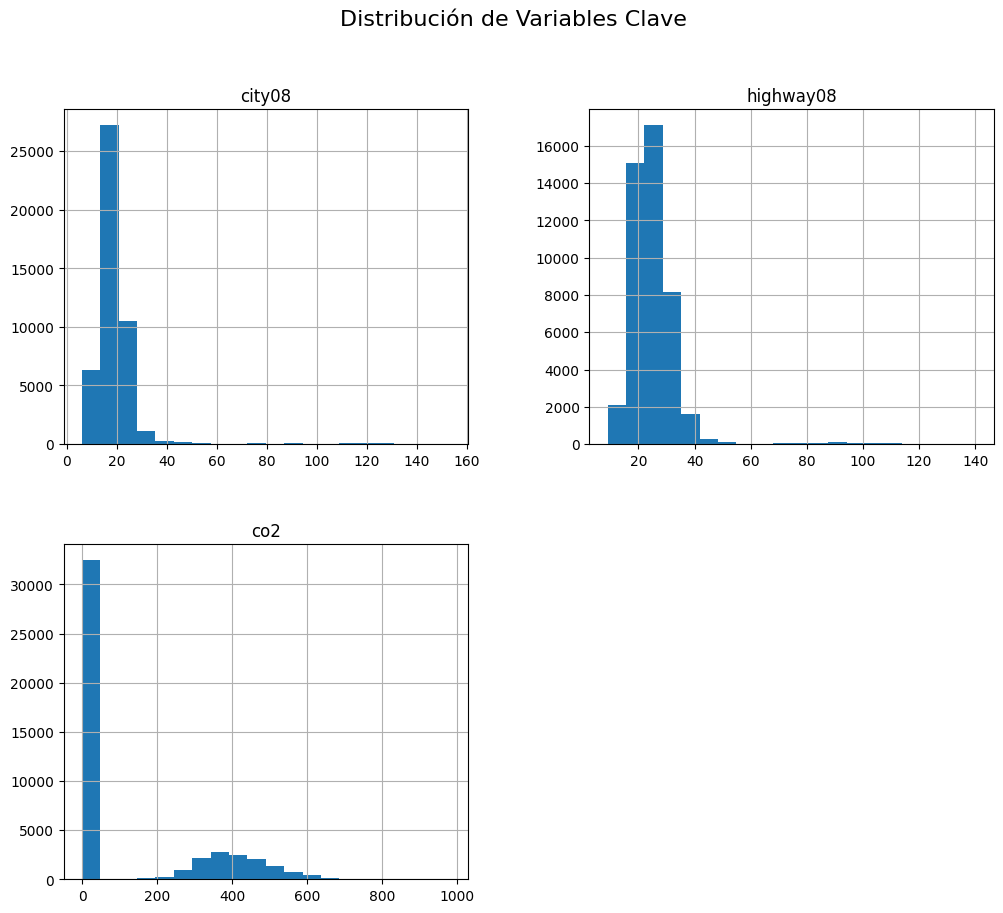

In [ ]:
# Histograma de algunas variables clave
plt.figure(figsize=(12, 8))
data[['city08', 'highway08', 'co2']].hist(bins=20, layout=(2, 2), figsize=(12, 10))
plt.suptitle('Distribución de Variables Clave', fontsize=16)
plt.show()


## 6. Matriz de Correlación de Variables Numéricas
Calculamos la matriz de correlación para ver la relación entre las variables numéricas, lo cual es útil para identificar posibles patrones o relaciones en el dataset.


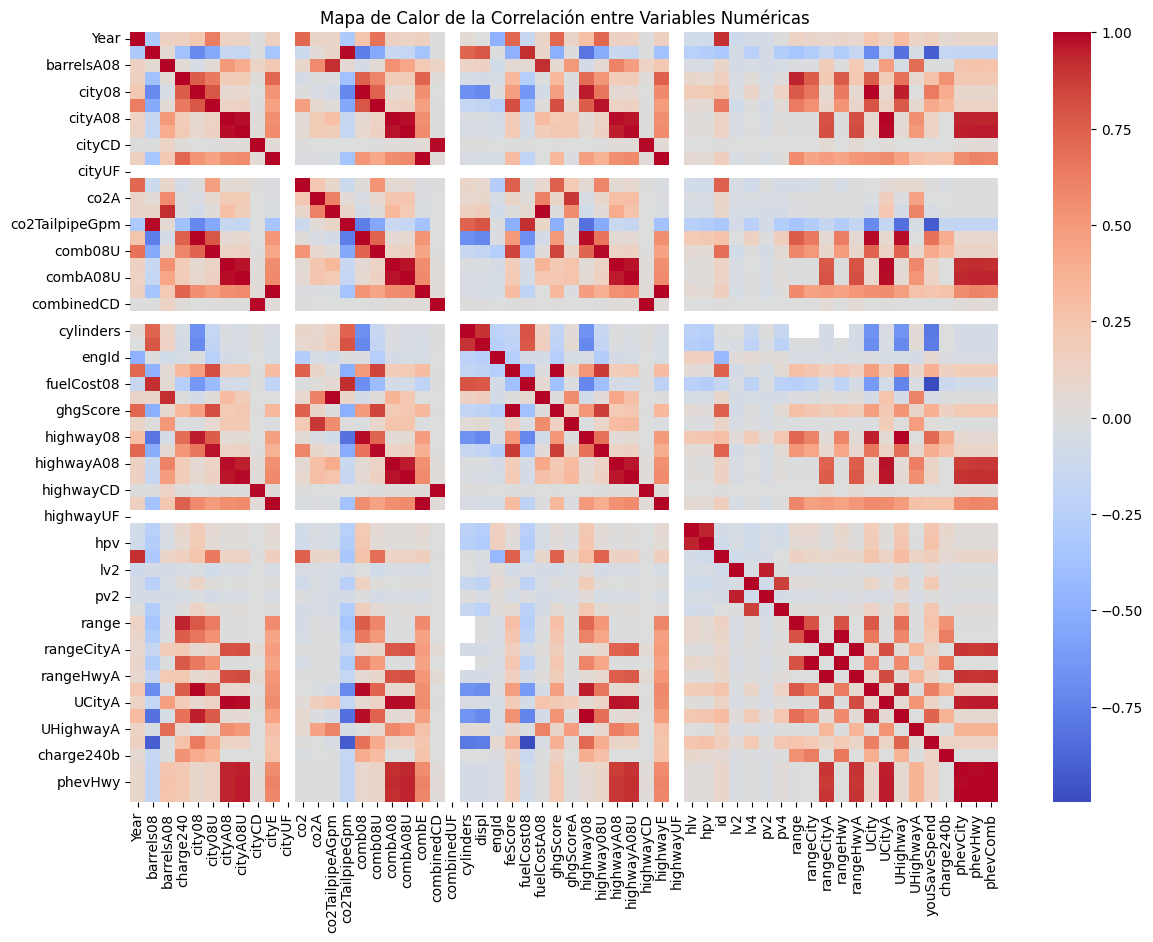

In [ ]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


## 7. Diccionario de Datos para Columnas Clave
Aquí se presenta un pequeño diccionario de datos con la descripción de algunas columnas clave para entender mejor el significado de los datos.


In [ ]:
# Diccionario de datos - Descripción de algunas columnas clave
metadata = {
    "Year": "Año de fabricación del vehículo",
    "Manufacturer": "Nombre del fabricante",
    "Model": "Modelo del vehículo",
    "barrels08": "Consumo de combustible en barriles por año",
    "city08": "Consumo de combustible en ciudad (mpg)",
    "highway08": "Consumo de combustible en carretera (mpg)",
    "co2": "Emisiones de CO2 en gramos/milla",
    "fuelType": "Tipo de combustible",
}
metadata_df = pd.DataFrame(metadata.items(), columns=["Column", "Description"])
print("\nDiccionario de Datos - Descripción de Columnas Clave:\n", metadata_df)



Diccionario de Datos - Descripción de Columnas Clave:
          Column                                 Description
0          Year             Año de fabricación del vehículo
1  Manufacturer                       Nombre del fabricante
2         Model                         Modelo del vehículo
3     barrels08  Consumo de combustible en barriles por año
4        city08      Consumo de combustible en ciudad (mpg)
5     highway08   Consumo de combustible en carretera (mpg)
6           co2            Emisiones de CO2 en gramos/milla
7      fuelType                         Tipo de combustible


# Análisis Exploratorio de Datos (EDA) - Dataset de For Hire Vehicles FHV
Este notebook realiza un análisis exploratorio de datos (EDA) en el dataset de vehículos de alquiler activos, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (actualiza la ruta del archivo si es necesario)
file_path = '/content/For_Hire_Vehicles__FHV__-_Active_20241107.csv'
data = pd.read_csv(file_path)

# Vista rápida de los datos
data.head()


,Active,Vehicle License Number,Name,License Type,Expiration Date,Permit License Number,DMV License Plate Number,Vehicle VIN Number,Wheelchair Accessible,Certification Date,...,Base Name,Base Type,VEH,Base Telephone Number,Website,Base Address,Reason,Order Date,Last Date Updated,Last Time Updated
0,YES,5708436,"AYGUN,BEKTAS",FOR HIRE VEHICLE,07/18/2026,NaN,T711699C,5TDBZRFH5KS973794,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,11/06/2024,13:25
1,YES,5770465,"UDDIN,,MUHAMMED,J",FOR HIRE VEHICLE,03/20/2025,NaN,T732956C,JTEAAAAH3NJ109979,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,11/06/2024,13:25
2,YES,5704988,"RANBIR,ENTERPRISES,INC",FOR HIRE VEHICLE,06/22/2026,NaN,T804010C,KNDPMCAC9M7937519,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,11/06/2024,13:25
3,YES,5830421,"FAROOQI,FAISAL,S",FOR HIRE VEHICLE,12/06/2025,NaN,T747579C,4T1BD1FK9EU118183,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,HYB,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,11/06/2024,13:25
4,YES,5878678,"STEPHENSON, DAVID,A",FOR HIRE VEHICLE,06/13/2026,NaN,T769863C,1HGCV2F35JA005350,NaN,NaN,...,"DD&SON,LLC",BLACK-CAR,NaN,(917)567-4082,NaN,7 MARCUS GARVEY BOULEVARD STE#316 BROOKLYN NY ...,G,NaN,11/06/2024,13:25


In [ ]:

print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 107940 filas y 23 columnas.


## 1. Tipos de Datos y Valores Únicos
En esta sección, exploramos los tipos de datos de cada columna y el número de valores únicos para obtener una idea inicial de la estructura del dataset.


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


Tipos de Datos y Valores Únicos:
                          Data Type  Unique Values
Active                      object              1
Vehicle License Number      object         107940
Name                        object          74849
License Type                object              1
Expiration Date             object            809
Permit License Number       object           1452
DMV License Plate Number    object         107939
Vehicle VIN Number          object         107940
Wheelchair Accessible       object              2
Certification Date          object           1718
Hack Up Date                object           1521
Vehicle Year                 int64             27
Base Number                 object            802
Base Name                   object            796
Base Type                   object              3
VEH                         object              8
Base Telephone Number       object            776
Website                     object            254
Base Address    

## 2. Valores Faltantes
Aquí mostramos la cantidad de valores faltantes en cada columna para identificar aquellas con datos incompletos.


In [ ]:
# Contar valores faltantes en cada columna
missing_values = data.isnull().sum()
print("\nValores Faltantes por Columna:\n", missing_values[missing_values > 0])



Valores Faltantes por Columna:
 Permit License Number    106488
Wheelchair Accessible     99654
Certification Date       104046
Hack Up Date             104063
VEH                       74770
Website                   97492
Order Date               107940
dtype: int64


## 3. Duplicados
Verificamos si hay filas duplicadas en el dataset, ya que pueden afectar el análisis.


In [ ]:
# Contar filas duplicadas
duplicates = data.duplicated().sum()
print("\nNúmero de Filas Duplicadas:", duplicates)



Número de Filas Duplicadas: 0


## 4. Estadísticas Descriptivas
Las estadísticas descriptivas permiten observar la media, desviación estándar, valores mínimos y máximos, entre otros. Estas métricas ayudan a detectar outliers en los datos.


In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas
descriptive_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", descriptive_stats)



Estadísticas Descriptivas:
         Vehicle Year  Order Date
count  107940.000000         0.0
mean     2019.632407         NaN
std         3.398141         NaN
min      1949.000000         NaN
25%      2017.000000         NaN
50%      2020.000000         NaN
75%      2023.000000         NaN
max      2025.000000         NaN


## 5. Distribución de las Variables Clave
Realizamos un análisis de la distribución de variables clave, como `Vehicle Year`, que representa el año de fabricación del vehículo.


<Figure size 1200x800 with 0 Axes>

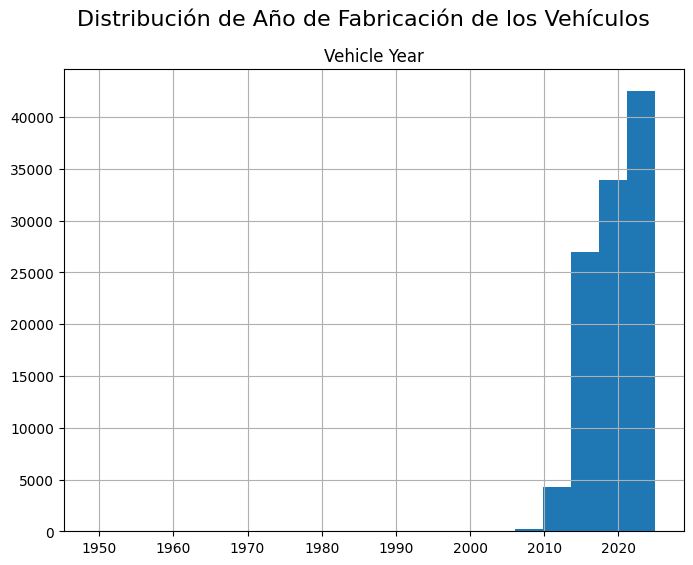

In [ ]:
# Histograma de algunas variables clave
plt.figure(figsize=(12, 8))
data[['Vehicle Year']].hist(bins=20, layout=(1, 1), figsize=(8, 6))
plt.suptitle('Distribución de Año de Fabricación de los Vehículos', fontsize=16)
plt.show()


## 6. Matriz de Correlación de Variables Numéricas
Calculamos la matriz de correlación para ver la relación entre las variables numéricas, lo cual es útil para identificar posibles patrones o relaciones en el dataset.


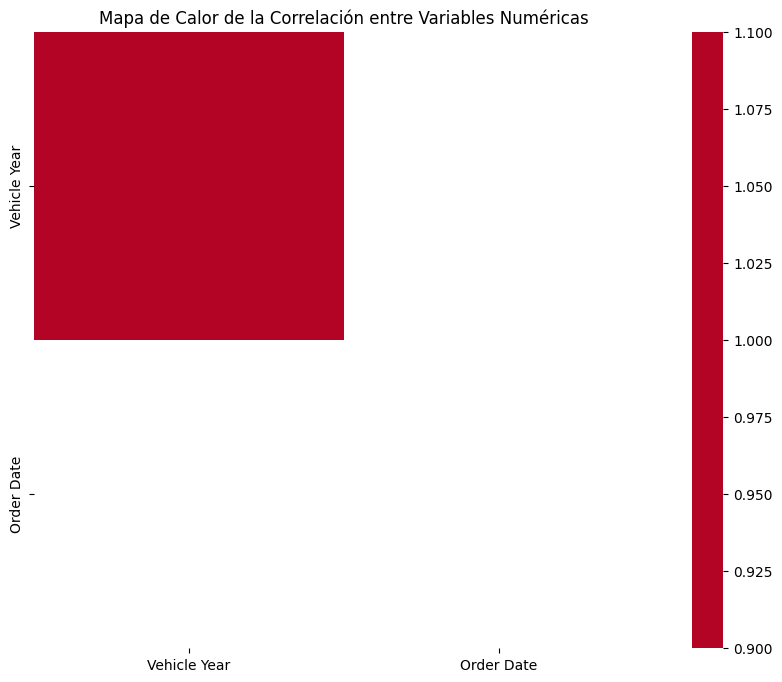

In [ ]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


## 7. Diccionario de Datos para Columnas Clave
Aquí se presenta un pequeño diccionario de datos con la descripción de algunas columnas clave para entender mejor el significado de los datos.


In [ ]:
# Diccionario de datos - Descripción de algunas columnas clave
metadata = {
    "Vehicle License Number": "Número de licencia del vehículo",
    "Name": "Nombre del conductor o empresa",
    "License Type": "Tipo de licencia del vehículo",
    "Expiration Date": "Fecha de expiración de la licencia",
    "Vehicle Year": "Año de fabricación del vehículo",
    "Base Name": "Nombre de la base",
    "Base Type": "Tipo de base",
    "Wheelchair Accessible": "Si el vehículo es accesible para sillas de ruedas",
}
metadata_df = pd.DataFrame(metadata.items(), columns=["Column", "Description"])
print("\nDiccionario de Datos - Descripción de Columnas Clave:\n", metadata_df)



Diccionario de Datos - Descripción de Columnas Clave:
                    Column                                        Description
0  Vehicle License Number                    Número de licencia del vehículo
1                    Name                     Nombre del conductor o empresa
2            License Type                      Tipo de licencia del vehículo
3         Expiration Date                 Fecha de expiración de la licencia
4            Vehicle Year                    Año de fabricación del vehículo
5               Base Name                                  Nombre de la base
6               Base Type                                       Tipo de base
7   Wheelchair Accessible  Si el vehículo es accesible para sillas de ruedas


# Análisis Exploratorio de Datos (EDA) - Dataset de Yellow Taxi Trips
Este notebook realiza un análisis exploratorio de datos (EDA) en el dataset de viajes de taxis amarillos, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (actualiza la ruta del archivo si es necesario)
file_path = '/content/yellow_tripdata_2024-08.csv'
data = pd.read_csv(file_path)

# Vista rápida de los datos
data.head()


<ipython-input-74-7e94801727e7>:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-08-01 00:21:00,2024-08-01 00:36:13,1.0,7.40,1.0,N,138,80,1,28.900000,7.75,0.5,7.65,0.00,1.0,45.799999,0.0,1.75
1,2,2024-08-01 00:20:01,2024-08-01 00:41:47,1.0,9.91,1.0,N,138,239,1,40.799999,6.00,0.5,11.55,6.94,1.0,71.040001,2.5,1.75
2,1,2024-08-01 00:17:52,2024-08-01 00:41:45,0.0,13.40,1.0,N,138,88,1,52.000000,10.25,0.5,15.00,0.00,1.0,78.750000,2.5,1.75
3,1,2024-08-01 00:49:08,2024-08-01 00:55:56,0.0,3.90,1.0,N,209,137,3,17.000000,3.50,0.5,0.00,0.00,1.0,22.000000,2.5,0.00
4,1,2024-08-01 00:38:52,2024-08-01 00:42:34,1.0,0.40,1.0,N,148,144,2,5.100000,3.50,0.5,0.00,0.00,1.0,10.100000,2.5,0.00


In [ ]:

print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 2979183 filas y 19 columnas.


## 1. Tipos de Datos y Valores Únicos
En esta sección, exploramos los tipos de datos de cada columna y el número de valores únicos para obtener una idea inicial de la estructura del dataset.


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


Tipos de Datos y Valores Únicos:
                       Data Type  Unique Values
VendorID                  int64              2
tpep_pickup_datetime     object        1596631
tpep_dropoff_datetime    object        1595582
passenger_count         float64             10
trip_distance           float64           7924
RatecodeID              float64              7
store_and_fwd_flag       object              2
PULocationID              int64            259
DOLocationID              int64            261
payment_type              int64              5
fare_amount             float64          10403
extra                   float64             73
mta_tax                 float64              8
tip_amount              float64           4570
tolls_amount            float64           1223
improvement_surcharge   float64              4
total_amount            float64          22338
congestion_surcharge    float64              4
Airport_fee             float64              3


## 2. Valores Faltantes
Aquí mostramos la cantidad de valores faltantes en cada columna para identificar aquellas con datos incompletos.


In [ ]:
# Contar valores faltantes en cada columna
missing_values = data.isnull().sum()
print("\nValores Faltantes por Columna:\n", missing_values[missing_values > 0])



Valores Faltantes por Columna:
 passenger_count         258667
RatecodeID              258667
store_and_fwd_flag      258667
congestion_surcharge    258667
Airport_fee             258667
dtype: int64


## 3. Duplicados
Verificamos si hay filas duplicadas en el dataset, ya que pueden afectar el análisis.


In [ ]:
# Contar filas duplicadas
duplicates = data.duplicated().sum()
print("\nNúmero de Filas Duplicadas:", duplicates)



Número de Filas Duplicadas: 0


## 4. Estadísticas Descriptivas
Las estadísticas descriptivas permiten observar la media, desviación estándar, valores mínimos y máximos, entre otros. Estas métricas ayudan a detectar outliers en los datos.


In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas
descriptive_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", descriptive_stats)



Estadísticas Descriptivas:
            VendorID  passenger_count  trip_distance    RatecodeID  \
count  2.979183e+06     2.720516e+06   2.979183e+06  2.720516e+06   
mean   1.771668e+00     1.359517e+00   4.944864e+00  2.693665e+00   
std    4.197576e-01     8.362148e-01   3.785274e+02  1.236937e+01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    2.000000e+00     1.000000e+00   1.030000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.600000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   3.270252e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  2.979183e+06  2.979183e+06  2.979183e+06  2.979183e+06  2.979183e+06   
mean   1.618817e+02  1.611603e+02  1.150908e+00  1.972051e+01  1.388618e+00   
std    6.389866e+01  6.976529e+01  6.773365e-01  2.102358e+01  1.844761e+00   
min    1.000000e+00  1.000000e+00

## 5. Distribución de las Variables Clave
Realizamos un análisis de la distribución de variables clave, como `trip_distance`, `fare_amount`, y `total_amount`, que representan la distancia del viaje, la tarifa y el monto total pagado.


<Figure size 1200x800 with 0 Axes>

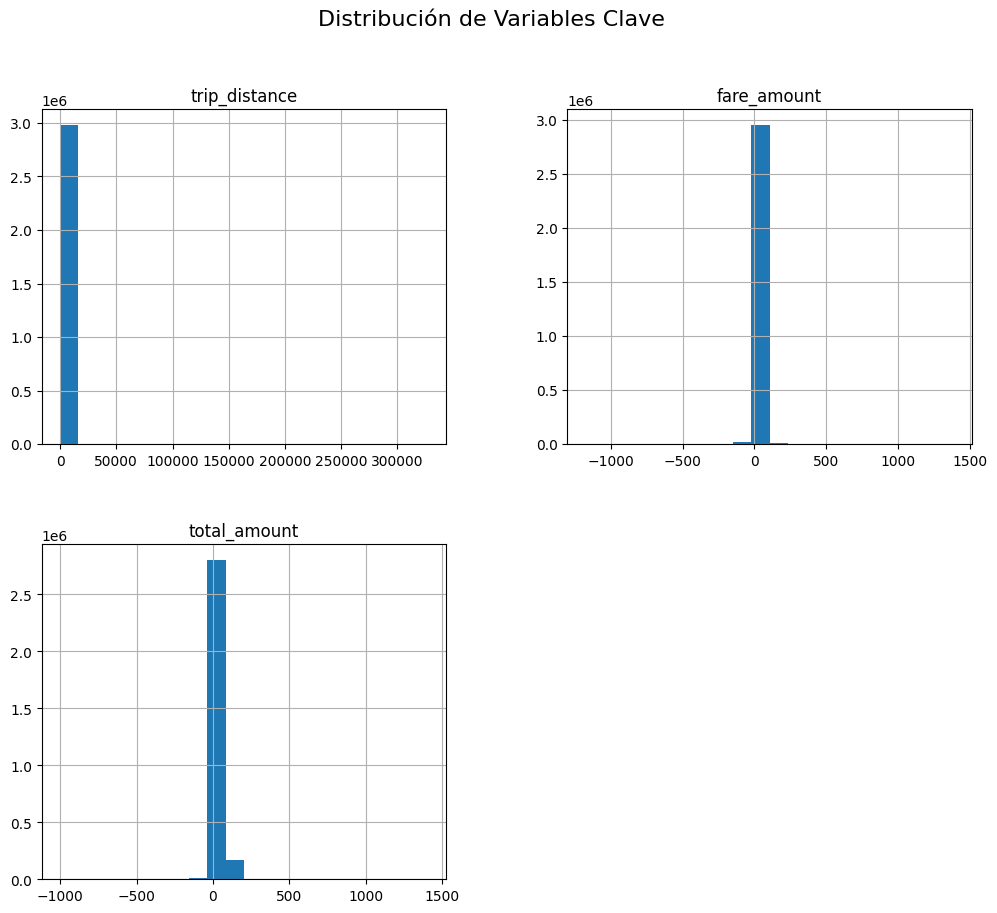

In [ ]:
# Histograma de algunas variables clave
plt.figure(figsize=(12, 8))
data[['trip_distance', 'fare_amount', 'total_amount']].hist(bins=20, layout=(2, 2), figsize=(12, 10))
plt.suptitle('Distribución de Variables Clave', fontsize=16)
plt.show()


## 6. Matriz de Correlación de Variables Numéricas
Calculamos la matriz de correlación para ver la relación entre las variables numéricas, lo cual es útil para identificar posibles patrones o relaciones en el dataset.


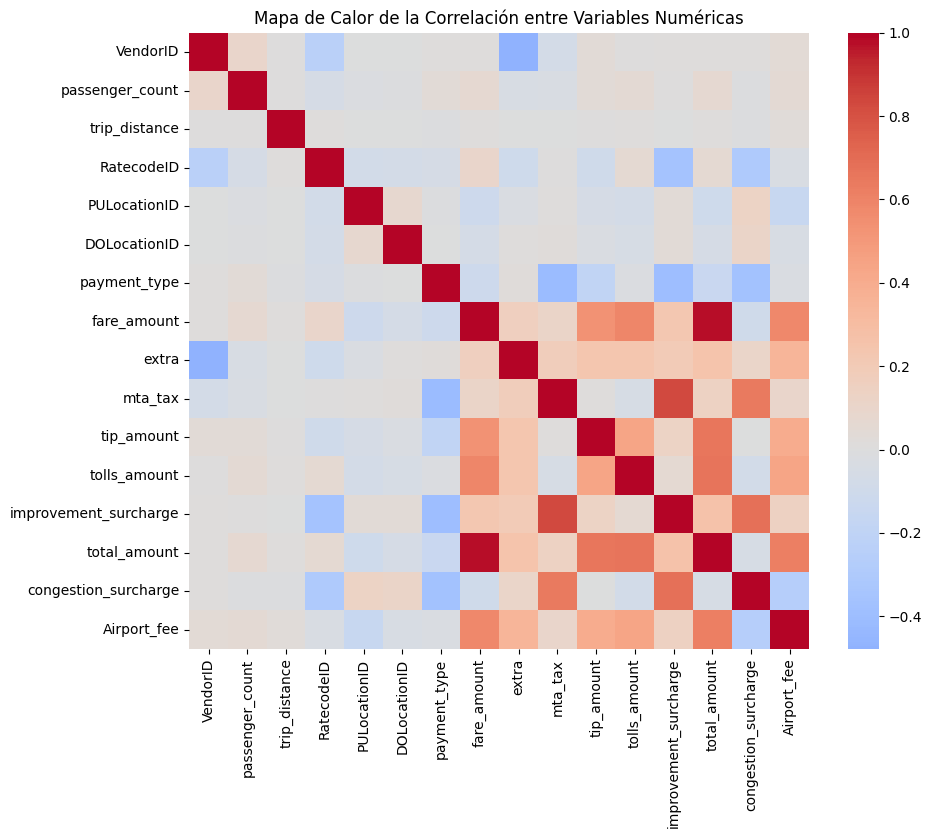

In [ ]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


## 7. Diccionario de Datos para Columnas Clave
Aquí se presenta un pequeño diccionario de datos con la descripción de algunas columnas clave para entender mejor el significado de los datos.


In [ ]:
# Diccionario de datos - Descripción de algunas columnas clave
metadata = {
    "trip_distance": "Distancia del viaje en millas",
    "fare_amount": "Monto de la tarifa del viaje",
    "total_amount": "Monto total pagado (incluye tarifa, peajes, etc.)",
    "pickup_datetime": "Fecha y hora en que se recogió al pasajero",
    "dropoff_datetime": "Fecha y hora en que se dejó al pasajero",
    "passenger_count": "Número de pasajeros en el viaje",
}
metadata_df = pd.DataFrame(metadata.items(), columns=["Column", "Description"])
print("\nDiccionario de Datos - Descripción de Columnas Clave:\n", metadata_df)



Diccionario de Datos - Descripción de Columnas Clave:
              Column                                        Description
0     trip_distance                      Distancia del viaje en millas
1       fare_amount                       Monto de la tarifa del viaje
2      total_amount  Monto total pagado (incluye tarifa, peajes, etc.)
3   pickup_datetime         Fecha y hora en que se recogió al pasajero
4  dropoff_datetime            Fecha y hora en que se dejó al pasajero
5   passenger_count                    Número de pasajeros en el viaje


# Análisis Exploratorio de Datos (EDA) - Dataset de Green Taxi Trips
Este notebook realiza un análisis exploratorio de datos (EDA) en el dataset de viajes de taxis verdes, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (actualiza la ruta del archivo si es necesario)
file_path = '/content/green_tripdata_2024-08 (1).csv'
data = pd.read_csv(file_path)

# Vista rápida de los datos
data.head()


,2,2024-08-01 00:16:00,2024-08-01 00:35:20,N,1,65,228,1.1,2.85,19.8,1.0,0.5,0.0,0.0.1,Unnamed: 14,1.0.1,22.3,2.1,1.2,0.0.2
0,2,2024-08-01 00:03:29,2024-08-01 00:09:21,N,1.0,74,74,1.0,0.58,7.2,1.0,0.5,0.00,0.0,NaN,1.0,9.70,2.0,1.0,0.00
1,2,2024-08-01 00:27:39,2024-08-01 01:07:55,N,1.0,129,83,1.0,1.54,33.1,1.0,0.5,0.00,0.0,NaN,1.0,35.60,2.0,1.0,0.00
2,2,2024-08-01 00:21:35,2024-08-01 00:39:39,N,1.0,66,90,1.0,4.57,22.6,1.0,0.5,5.57,0.0,NaN,1.0,33.42,1.0,1.0,2.75
3,2,2024-08-01 00:35:09,2024-08-01 00:46:49,N,1.0,129,112,1.0,3.63,17.7,1.0,0.5,0.00,0.0,NaN,1.0,20.20,1.0,1.0,0.00
4,2,2024-07-31 23:13:18,2024-07-31 23:19:35,N,1.0,75,74,1.0,1.72,10.0,1.0,0.5,0.00,0.0,NaN,1.0,12.50,1.0,1.0,0.00


In [ ]:
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 51770 filas y 20 columnas.


## 1. Tipos de Datos y Valores Únicos
En esta sección, exploramos los tipos de datos de cada columna y el número de valores únicos para obtener una idea inicial de la estructura del dataset.


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


Tipos de Datos y Valores Únicos:
                     Data Type  Unique Values
2                       int64              2
2024-08-01 00:16:00    object          50838
2024-08-01 00:35:20    object          50852
N                      object              2
1                     float64              7
65                      int64            236
228                     int64            248
1.1                   float64             10
2.85                  float64           2035
19.8                  float64           1511
1.0                   float64             16
0.5                   float64              6
0.0                   float64           1633
0.0.1                 float64             36
Unnamed: 14           float64              0
1.0.1                 float64              5
22.3                  float64           4842
2.1                   float64              5
1.2                   float64              2
0.0.2                 float64              5


## 2. Valores Faltantes
Aquí mostramos la cantidad de valores faltantes en cada columna para identificar aquellas con datos incompletos.


In [ ]:
# Contar valores faltantes en cada columna
missing_values = data.isnull().sum()
print("\nValores Faltantes por Columna:\n", missing_values[missing_values > 0])



Valores Faltantes por Columna:
 N               1584
1               1584
1.1             1584
Unnamed: 14    51770
2.1             1584
1.2             1629
0.0.2           1584
dtype: int64


## 3. Duplicados
Verificamos si hay filas duplicadas en el dataset, ya que pueden afectar el análisis.


In [ ]:
# Contar filas duplicadas
duplicates = data.duplicated().sum()
print("\nNúmero de Filas Duplicadas:", duplicates)



Número de Filas Duplicadas: 0


## 4. Estadísticas Descriptivas
Las estadísticas descriptivas permiten observar la media, desviación estándar, valores mínimos y máximos, entre otros. Estas métricas ayudan a detectar outliers en los datos.


In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas
descriptive_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", descriptive_stats)



Estadísticas Descriptivas:
                   2             1            65           228           1.1  \
count  51770.000000  50186.000000  51770.000000  51770.000000  50186.000000   
mean       1.881901      1.278444     97.035832    141.265752      1.328418   
std        0.322729      1.391537     57.011126     76.426286      0.978304   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        2.000000      1.000000     74.000000     74.000000      1.000000   
50%        2.000000      1.000000     75.000000    138.000000      1.000000   
75%        2.000000      1.000000     97.000000    225.000000      1.000000   
max        2.000000     99.000000    265.000000    265.000000      9.000000   

                2.85          19.8           1.0           0.5           0.0  \
count   51770.000000  51770.000000  51770.000000  51770.000000  51770.000000   
mean       19.708131     19.759256      0.971093      0.562430      2.761994   
std      1257.50713

## 5. Distribución de las Variables Clave
Realizamos un análisis de la distribución de variables clave, como `trip_distance`, `fare_amount`, y `total_amount`, que representan la distancia del viaje, la tarifa y el monto total pagado.


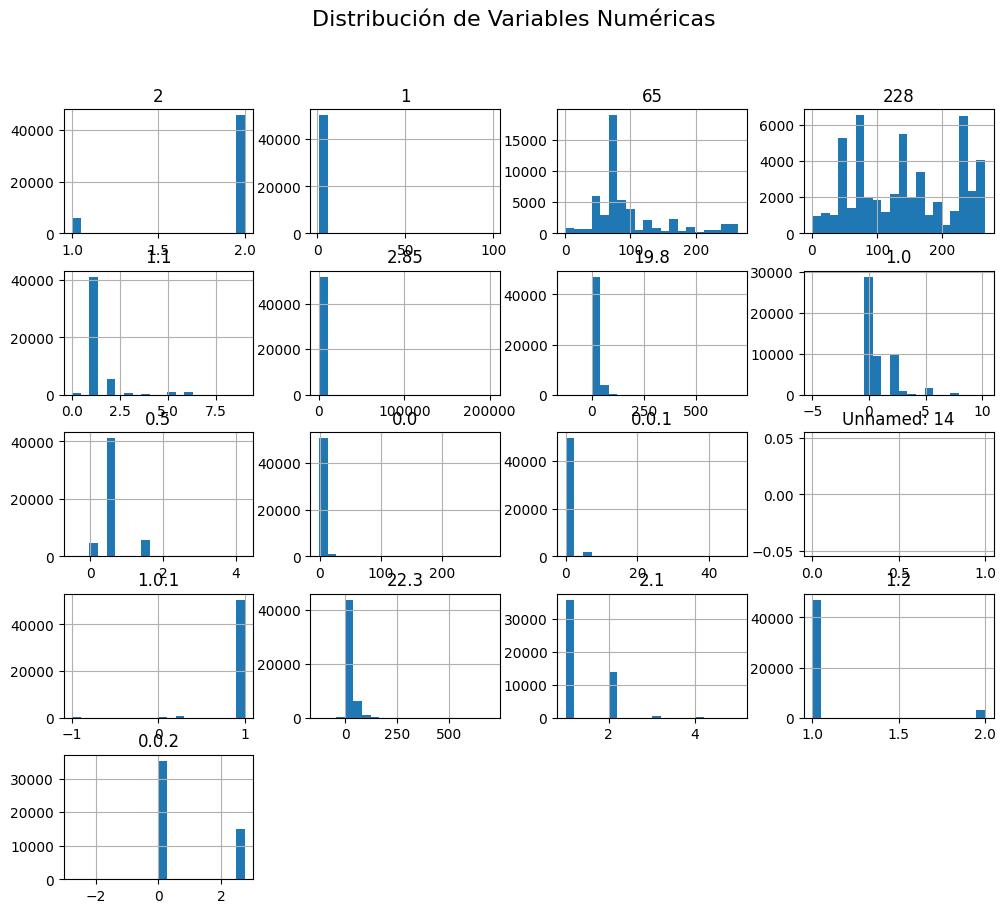

In [ ]:
# Histograma: Identificar columnas numéricas y graficarlas
# Seleccionar solo columnas numéricas si existen
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

if len(numeric_columns) > 0:
    # Graficar histogramas para todas las columnas numéricas
    data[numeric_columns].hist(bins=20, figsize=(12, 10))
    plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
    plt.show()
else:
    print("No se encontraron columnas numéricas para graficar.")


## 6. Matriz de Correlación de Variables Numéricas
Calculamos la matriz de correlación para ver la relación entre las variables numéricas, lo cual es útil para identificar posibles patrones o relaciones en el dataset.


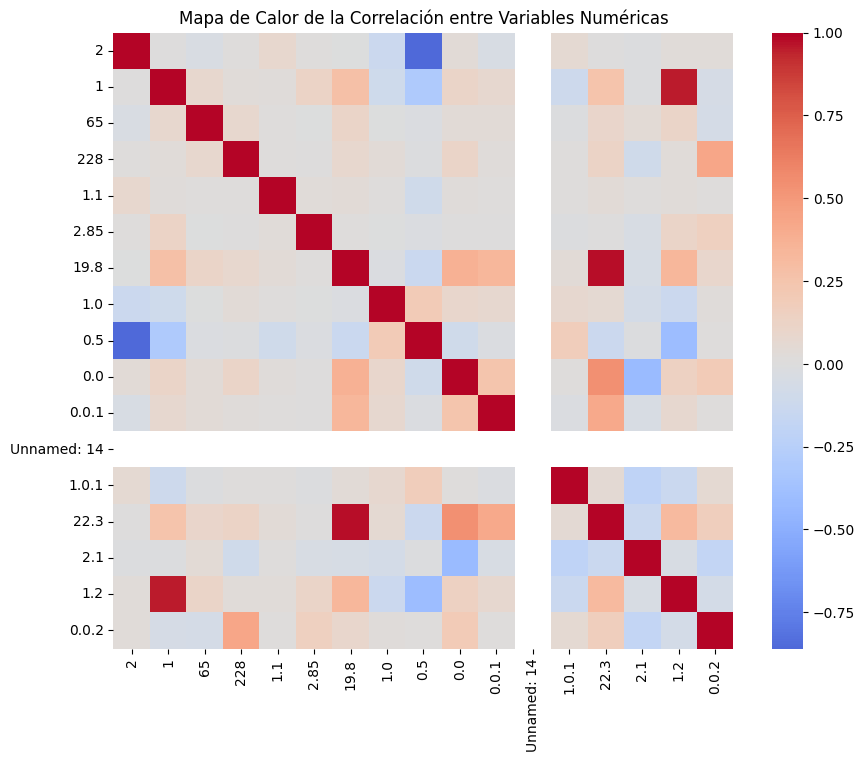

In [ ]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


## 7. Diccionario de Datos para Columnas Clave
Aquí se presenta un pequeño diccionario de datos con la descripción de algunas columnas clave para entender mejor el significado de los datos.


In [ ]:
# Diccionario de datos - Descripción de algunas columnas clave
metadata = {
    "trip_distance": "Distancia del viaje en millas",
    "fare_amount": "Monto de la tarifa del viaje",
    "total_amount": "Monto total pagado (incluye tarifa, peajes, etc.)",
    "pickup_datetime": "Fecha y hora en que se recogió al pasajero",
    "dropoff_datetime": "Fecha y hora en que se dejó al pasajero",
    "passenger_count": "Número de pasajeros en el viaje",
}
metadata_df = pd.DataFrame(metadata.items(), columns=["Column", "Description"])
print("\nDiccionario de Datos - Descripción de Columnas Clave:\n", metadata_df)



Diccionario de Datos - Descripción de Columnas Clave:
              Column                                        Description
0     trip_distance                      Distancia del viaje en millas
1       fare_amount                       Monto de la tarifa del viaje
2      total_amount  Monto total pagado (incluye tarifa, peajes, etc.)
3   pickup_datetime         Fecha y hora en que se recogió al pasajero
4  dropoff_datetime            Fecha y hora en que se dejó al pasajero
5   passenger_count                    Número de pasajeros en el viaje


# Análisis Exploratorio de Datos (EDA) - Dataset de FHV (For-Hire Vehicles) Trip Data
Este notebook realiza un análisis exploratorio de datos (EDA) en el dataset de viajes de vehículos de alquiler, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (actualiza la ruta del archivo si es necesario)
file_path = '/content/fhv_tripdata_2024-08.csv'
data = pd.read_csv(file_path)

# Vista rápida de los datos
data.head()


,B00013,2024-08-01 00:21:00,2024-08-01 02:26:00,Unnamed: 3,Unnamed: 4,Unnamed: 5,B00014
0,B00013,2024-08-01 00:00:00,2024-08-01 00:47:00,NaN,NaN,NaN,B00381
1,B00111,2024-08-01 00:55:00,2024-08-01 01:25:00,NaN,NaN,NaN,B00111
2,B00111,2024-08-01 00:20:00,2024-08-01 00:55:00,NaN,NaN,NaN,B00111
3,B00111,2024-08-01 00:33:00,2024-08-01 01:20:00,NaN,NaN,NaN,B00111
4,B00111,2024-08-01 00:14:00,2024-08-01 00:49:00,NaN,NaN,NaN,B00111


In [ ]:
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 1484470 filas y 7 columnas.


## 1. Tipos de Datos y Valores Únicos
En esta sección, exploramos los tipos de datos de cada columna y el número de valores únicos para obtener una idea inicial de la estructura del dataset.


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


Tipos de Datos y Valores Únicos:
                     Data Type  Unique Values
B00013                 object            386
2024-08-01 00:21:00    object         950235
2024-08-01 02:26:00    object         953930
Unnamed: 3            float64            258
Unnamed: 4            float64            260
Unnamed: 5            float64              0
B00014                 object            719


## 2. Valores Faltantes
Aquí, calculamos la cantidad de valores faltantes en cada columna para determinar si es necesario hacer alguna limpieza adicional.


In [ ]:
# Calcular valores faltantes
missing_values = data.isnull().sum()
print("\nValores Faltantes por Columna:\n", missing_values[missing_values > 0])



Valores Faltantes por Columna:
 Unnamed: 3    1238997
Unnamed: 4     297867
Unnamed: 5    1484470
B00014          14114
dtype: int64


## 3. Duplicados
Verificamos si hay filas duplicadas que puedan eliminarse para mejorar la calidad de los datos.


In [ ]:
# Verificar duplicados
duplicates = data.duplicated().sum()
print("\nNúmero de Filas Duplicadas:", duplicates)



Número de Filas Duplicadas: 2398


## 4. Estadísticas Descriptivas y Outliers
Calculamos estadísticas descriptivas de las columnas numéricas para ayudar a identificar posibles outliers.


In [ ]:
# Estadísticas descriptivas
descriptive_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", descriptive_stats)



Estadísticas Descriptivas:
           Unnamed: 3    Unnamed: 4  Unnamed: 5
count  245473.000000  1.186603e+06         0.0
mean      135.531896  1.350126e+02         NaN
std        75.525763  7.834637e+01         NaN
min         1.000000  1.000000e+00         NaN
25%        72.000000  6.900000e+01         NaN
50%       137.000000  1.320000e+02         NaN
75%       206.000000  2.100000e+02         NaN
max       265.000000  2.650000e+02         NaN


## 5. Distribución de Variables Clave
Generamos gráficos para observar la distribución de las variables principales en el dataset.


<Figure size 1200x800 with 0 Axes>

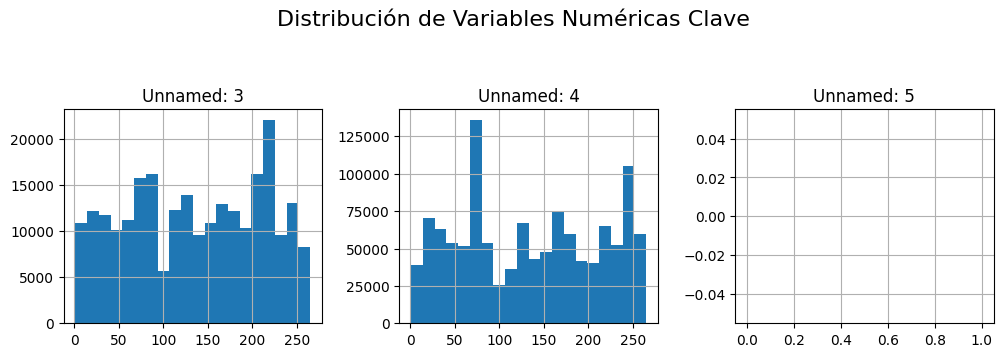

In [ ]:
# Histograma de algunas variables clave
plt.figure(figsize=(12, 8))
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, layout=(3, 3), figsize=(12, 10))
plt.suptitle('Distribución de Variables Numéricas Clave', fontsize=16)
plt.show()


## 6. Matriz de Correlación de Variables Numéricas
Calculamos la matriz de correlación entre las variables numéricas y visualizamos los resultados en un mapa de calor.


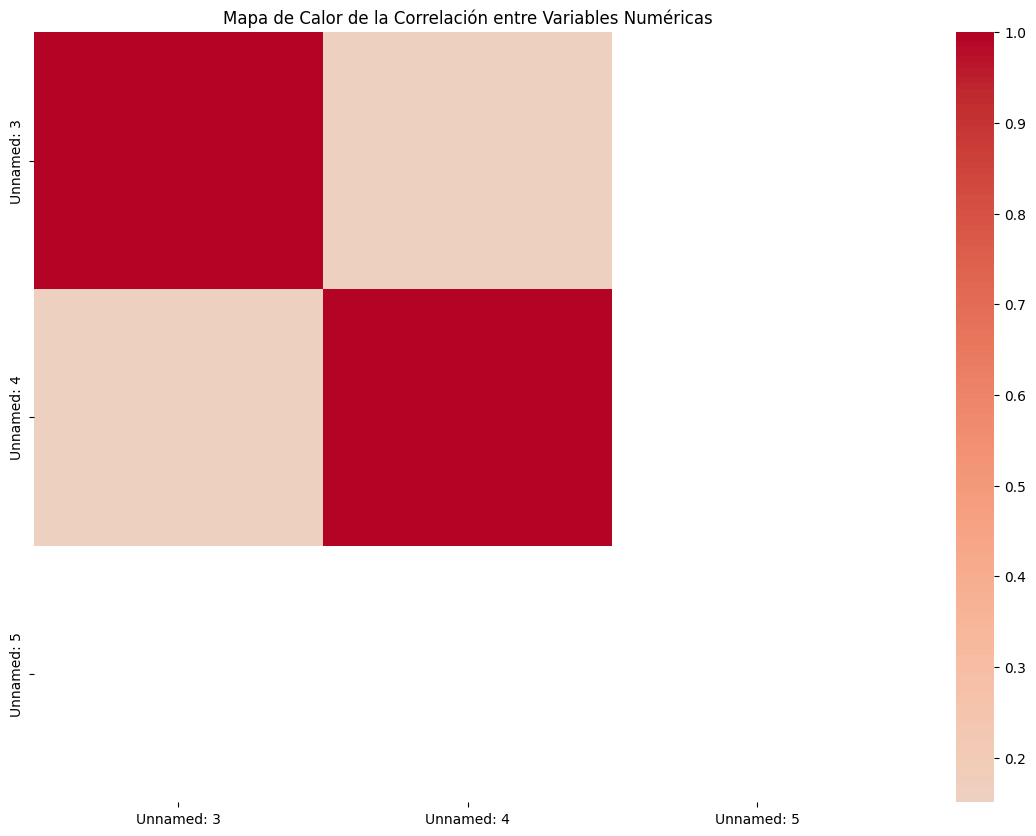

In [ ]:
# Matriz de correlación (seleccionando solo columnas numéricas)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


## 7. Diccionario de Datos (Resumen de Columnas Clave)
A continuación, resumimos algunas columnas clave del dataset para facilitar el entendimiento del análisis.


In [ ]:
# Diccionario de algunas columnas clave (como ejemplo)
columns_description = {
    'pickup_datetime': 'Fecha y hora en que se recogió al pasajero',
    'dropoff_datetime': 'Fecha y hora en que se dejó al pasajero',
    'PUlocationID': 'ID de ubicación de recogida',
    'DOlocationID': 'ID de ubicación de destino',
    'trip_distance': 'Distancia del viaje en millas',
    'fare_amount': 'Monto de la tarifa'
}

for col, desc in columns_description.items():
    print(f"{col}: {desc}")


pickup_datetime: Fecha y hora en que se recogió al pasajero
dropoff_datetime: Fecha y hora en que se dejó al pasajero
PUlocationID: ID de ubicación de recogida
DOlocationID: ID de ubicación de destino
trip_distance: Distancia del viaje en millas
fare_amount: Monto de la tarifa


# Análisis Exploratorio de Datos (EDA) - Dataset de Vehículos de Combustible Alternativo en EE. UU.
Este notebook realiza un análisis exploratorio de datos (EDA) en el dataset de vehículos de combustible alternativo, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (actualiza la ruta del archivo si es necesario)
file_path = '/content/Alternative Fuel Vehicles US.csv'
data = pd.read_csv(file_path)

# Vista rápida de los datos
data.head()


,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [ ]:
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 882 filas y 22 columnas.


## 1. Tipos de Datos y Valores Únicos
En esta sección, exploramos los tipos de datos de cada columna y el número de valores únicos para obtener una idea inicial de la estructura del dataset.


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Tipos de Datos y Valores Únicos:\n", eda_summary)


Tipos de Datos y Valores Únicos:
                                    Data Type  Unique Values
Category                              object             15
Model                                 object            633
Model Year                           float64              2
Manufacturer                          object             81
Fuel                                  object             22
All-Electric Range                   float64            110
PHEV Total Range                     float64             25
Alternative Fuel Economy City        float64             68
Alternative Fuel Economy Highway     float64             66
Alternative Fuel Economy Combined    float64             88
Conventional Fuel Economy City       float64             43
Conventional Fuel Economy Highway    float64             40
Conventional Fuel Economy Combined   float64             40
Transmission Type                     object              4
Transmission Make                     object             32
Engine

## 2. Valores Faltantes
Identificamos columnas que contienen valores faltantes para evaluar su impacto en el análisis y considerar su limpieza o imputación.


In [ ]:
# Valores faltantes por columna
missing_values = data.isnull().sum()
print("\nValores Faltantes por Columna:\n", missing_values[missing_values > 0])



Valores Faltantes por Columna:
 Model Year                            288
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64


## 3. Duplicados
Verificamos si existen filas duplicadas en el dataset para limpiar datos redundantes en caso necesario.


In [ ]:
# Contar filas duplicadas
duplicates = data.duplicated().sum()
print("\nNúmero de Filas Duplicadas:", duplicates)



Número de Filas Duplicadas: 1


## 4. Estadísticas Descriptivas
Obtenemos estadísticas descriptivas de las columnas numéricas para identificar tendencias y posibles outliers.


In [ ]:
# Estadísticas descriptivas de columnas numéricas
descriptive_stats = data.describe()
print("\nEstadísticas Descriptivas:\n", descriptive_stats)



Estadísticas Descriptivas:
         Model Year  All-Electric Range  PHEV Total Range  \
count   594.000000          222.000000         43.000000   
mean   2021.538721          165.927928        450.465116   
std       0.498919          132.992955         93.042578   
min    2021.000000            8.000000        290.000000   
25%    2021.000000           23.000000        380.000000   
50%    2022.000000          203.000000        460.000000   
75%    2022.000000          260.000000        520.000000   
max    2022.000000          520.000000        640.000000   

       Alternative Fuel Economy City  Alternative Fuel Economy Highway  \
count                     169.000000                        169.000000   
mean                       84.585799                         77.591716   
std                        39.430696                         32.735123   
min                        10.000000                         12.000000   
25%                        71.000000                        

## 5. Distribución de Variables Clave
Generamos gráficos para observar la distribución de algunas variables clave y obtener una mejor comprensión de los datos.


In [ ]:
# Histograma de algunas variables numéricas clave (ajusta según tus columnas específicas)
plt.figure(figsize=(12, 8))
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, layout=(3, 3), figsize=(14, 10))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()


ValueError: Layout of 3x3 must be larger than required size 10

<Figure size 1200x800 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

## 6. Matriz de Correlación de Variables Numéricas
Calculamos y visualizamos la matriz de correlación para entender las relaciones entre las variables numéricas.


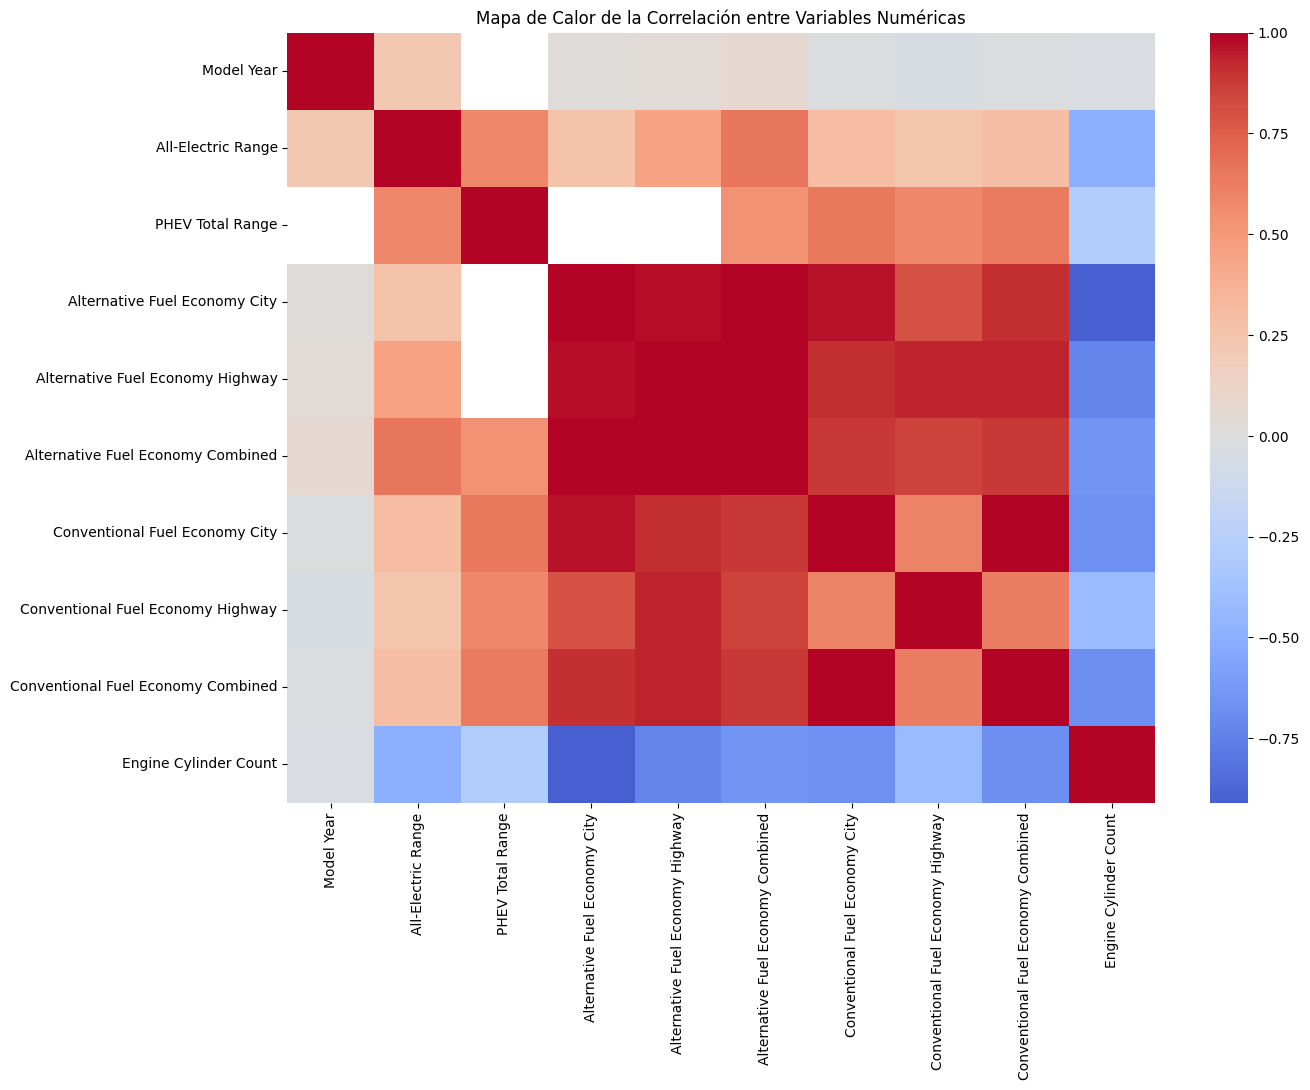

In [ ]:
# Matriz de correlación (seleccionando solo columnas numéricas)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.show()


## 7. Diccionario de Datos
Presentamos un diccionario de datos para las columnas clave, describiendo su propósito y posibles valores.


In [ ]:
# Diccionario de datos para columnas clave (escribe un breve resumen manualmente según el dataset)
print("Diccionario de datos:")
print("- Columnas principales y su propósito:")
print("  - Ejemplo: 'Column1': descripción...")


Diccionario de datos:
- Columnas principales y su propósito:
  - Ejemplo: 'Column1': descripción...


# Análisis Exploratorio de Datos (EDA) - Dataset de Medallion
Este notebook realiza un análisis exploratorio de datos (EDA) en el dataset `medallion_clean.csv`, cubriendo los siguientes puntos:

1. Tipos de datos y valores únicos
2. Valores faltantes
3. Duplicados
4. Estadísticas descriptivas y detección de outliers
5. Distribución de variables clave
6. Matriz de correlación de variables numéricas
7. Diccionario de datos para columnas clave


In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (asegúrate de actualizar la ruta si es necesario)
file_path = '/content/medallion_clean.csv'
data = pd.read_csv(file_path)

# Vista rápida de las primeras filas y nombres de las columnas
print("Primeras filas del dataset:")
print(data.head())
print("\nNombres de las columnas:")
print(data.columns)


Primeras filas del dataset:
  License Number Vehicle VIN Number Vehicle Type  Model Year Last Date Updated
0           1A10  NM0GS9E29P1553903          WAV      2023.0        2024-11-07
1           1A11  JTMRWRFV5ND149811          HYB      2022.0        2024-11-07
2           1A12  4T1BD1FK5EU127379          NaN      2016.0        2020-06-30
3           1A13  4T3LWRFV1MU047137          HYB      2021.0        2024-11-07
4           1A14  5TDZZ3DC3LS050041          WAV      2020.0        2024-11-07

Nombres de las columnas:
Index(['License Number', 'Vehicle VIN Number', 'Vehicle Type', 'Model Year',
       'Last Date Updated'],
      dtype='object')


In [ ]:
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas.")

El dataset tiene 13147 filas y 5 columnas.


## 1. Tipos de Datos y Valores Únicos
En esta sección, exploramos los tipos de datos de cada columna y el número de valores únicos para obtener una idea inicial de la estructura del dataset.


In [ ]:
# Tipos de datos y número de valores únicos por columna
data_types = data.dtypes
unique_counts = data.nunique()

# Crear un DataFrame para resumir los tipos de datos y valores únicos
eda_summary = pd.DataFrame({
    "Data Type": data_types,
    "Unique Values": unique_counts
})
print("Resumen de tipos de datos y valores únicos:")
print(eda_summary)


Resumen de tipos de datos y valores únicos:
                   Data Type  Unique Values
License Number        object          13147
Vehicle VIN Number    object          13147
Vehicle Type          object              6
Model Year           float64             20
Last Date Updated     object           1215


## 2. Valores Faltantes
Aquí, identificamos las columnas que contienen valores faltantes y el porcentaje de valores faltantes por columna.


In [ ]:
# Calcular la cantidad de valores faltantes por columna
missing_values = data.isnull().sum()
print("Cantidad de valores faltantes por columna:")
print(missing_values[missing_values > 0])


Cantidad de valores faltantes por columna:
Vehicle Type         2517
Model Year              1
Last Date Updated       1
dtype: int64


## 3. Duplicados
En esta sección, identificamos el número de registros duplicados en el dataset.


In [ ]:
# Contar registros duplicados
duplicate_count = data.duplicated().sum()
print(f"Número de registros duplicados: {duplicate_count}")


Número de registros duplicados: 0


## 4. Estadísticas Descriptivas y Detección de Outliers
Calculamos estadísticas descriptivas para las columnas numéricas y buscamos valores atípicos usando boxplots.


Estadísticas descriptivas para variables numéricas:
         Model Year
count  13146.000000
mean    2018.621786
std       18.004077
min        0.000000
25%     2015.000000
50%     2019.000000
75%     2022.000000
max     2025.000000


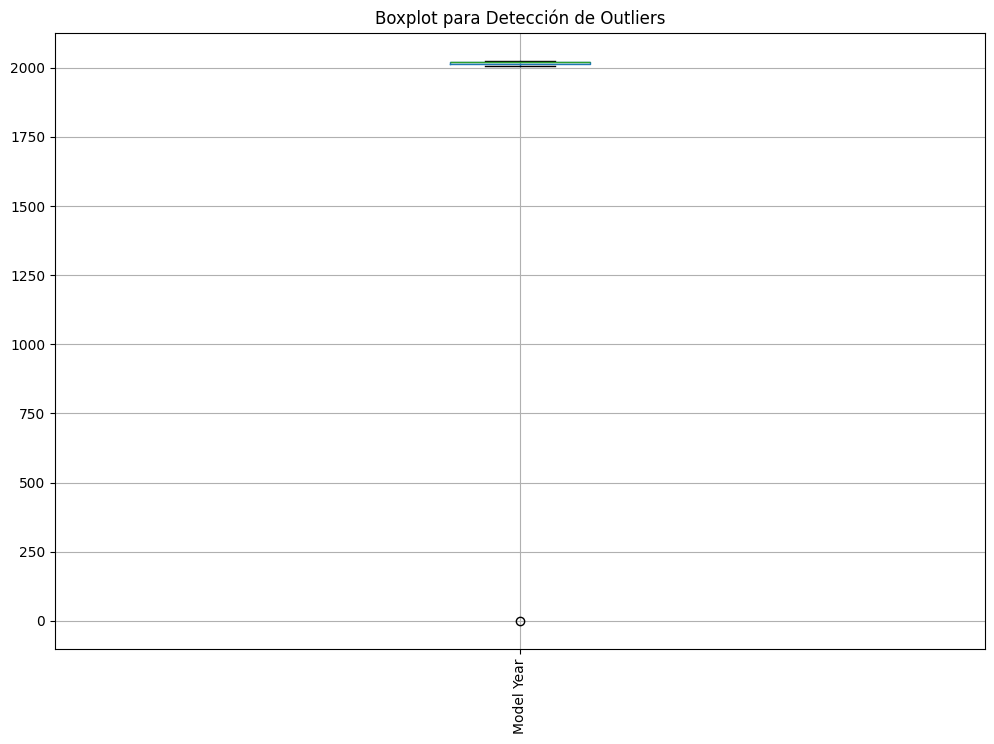

In [ ]:
# Resumen estadístico para columnas numéricas
print("Estadísticas descriptivas para variables numéricas:")
print(data.describe())

# Boxplot para identificar outliers en las columnas numéricas
plt.figure(figsize=(12, 8))
data.select_dtypes(include=['float64', 'int64']).boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot para Detección de Outliers")
plt.show()


## 5. Distribución de Variables Numéricas
Visualizamos la distribución de las columnas numéricas clave con histogramas.


<Figure size 1400x1000 with 0 Axes>

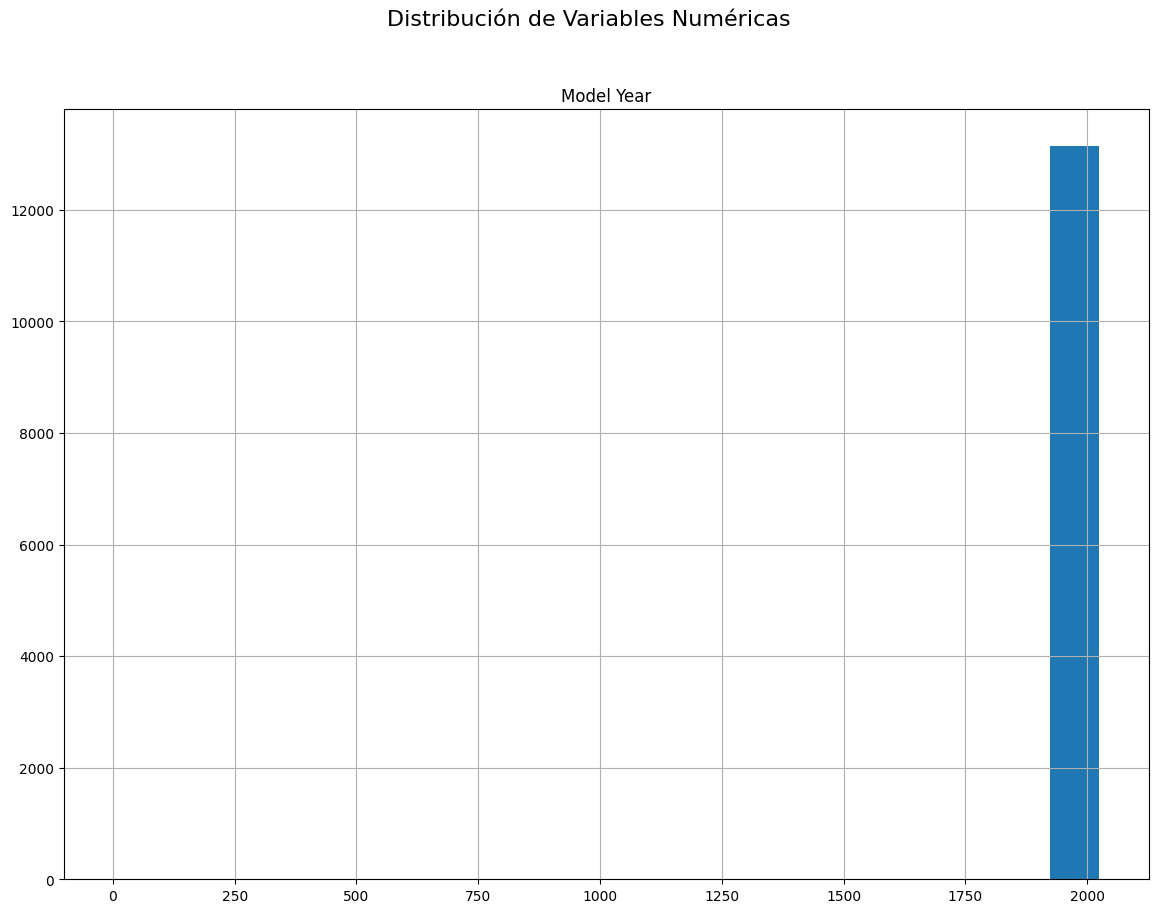

In [ ]:
# Histograma de variables numéricas con layout automático
plt.figure(figsize=(14, 10))
data.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()


## 6. Matriz de Correlación de Variables Numéricas
Creamos una matriz de correlación para las variables numéricas y visualizamos los resultados con un mapa de calor.


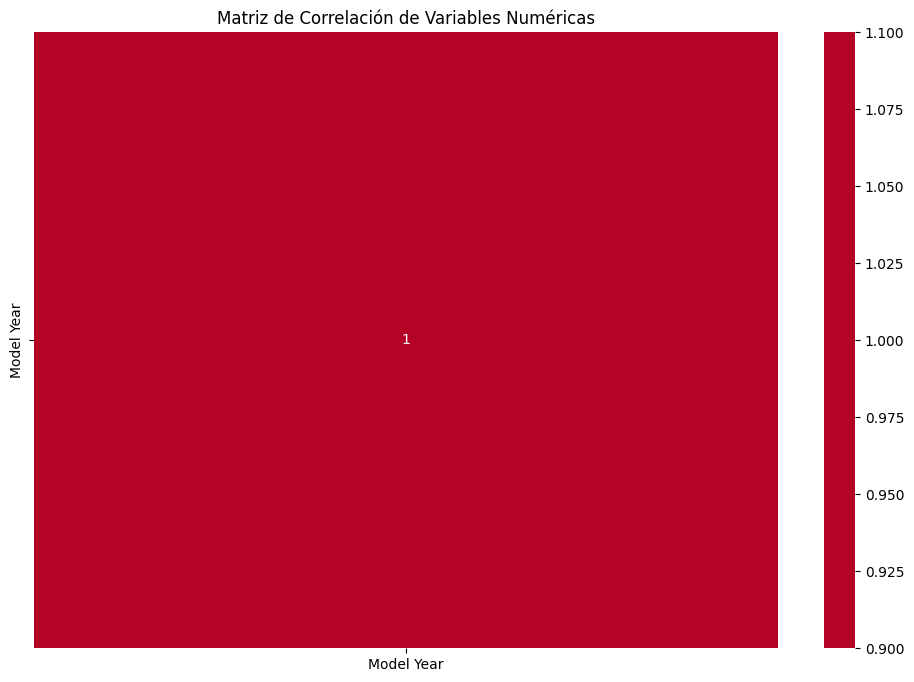

In [ ]:
# Matriz de correlación para variables numéricas
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


## 7. Diccionario de Datos para Columnas Clave
Para comprender mejor el significado de cada columna, podemos crear un diccionario de datos.


In [ ]:
# Diccionario de datos (este es un ejemplo manual; puedes ajustar según los datos específicos)
data_dictionary = {
    "nombre_columna_1": "Descripción de la columna 1",
    "nombre_columna_2": "Descripción de la columna 2",
    # Agrega más columnas y descripciones según sea necesario
}
print("Diccionario de Datos:")
for col, desc in data_dictionary.items():
    print(f"{col}: {desc}")


Diccionario de Datos:
nombre_columna_1: Descripción de la columna 1
nombre_columna_2: Descripción de la columna 2
